### 1. import dependencies

In [11]:
import pandas as pd
#datareader hack
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data
import datetime as dt
from dateutil.relativedelta import *

from matplotlib import pyplot as plt

# % is called "magic" and is a Jupyter way of showing visuals inline instead of opening an new window
%matplotlib inline 

### 2. get data

In [59]:
now = dt.datetime.now()
TenYearsAgo = now-relativedelta(years=10)
google = data.DataReader("GOOG", data_source="quandl", start=TenYearsAgo, end=now)
google.head(3)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,1063.00,1064.84,996.92,1005.10,3029471.0,0.0,1.0,1063.00,1064.84,996.92,1005.10,3029471.0
2018-03-26,1046.00,1055.63,1008.40,1053.21,2558385.0,0.0,1.0,1046.00,1055.63,1008.40,1053.21,2558385.0
2018-03-23,1047.03,1063.36,1021.22,1021.57,2113497.0,0.0,1.0,1047.03,1063.36,1021.22,1021.57,2113497.0


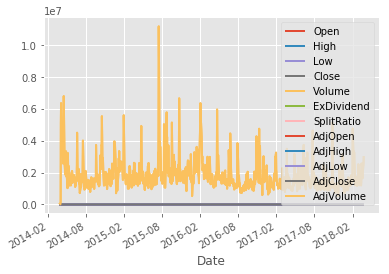

In [39]:
# .plot() the data
google.plot()

it looks like we are only seeing one of the principal data streams.  This is probably b/c the adjusted volume is at a scale so much higher than everything else.

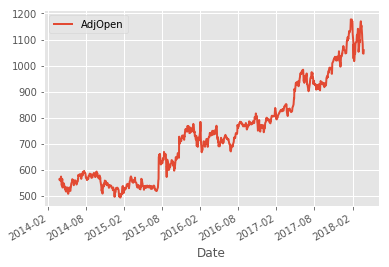

In [40]:
#focus on showing a specific column
google.plot(y="AdjOpen")

wow!  You can see that Google's stock has steadily climbed over eve the past 5 years

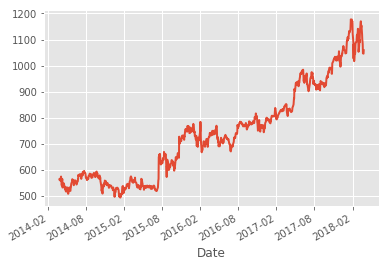

In [41]:
#another way to get a single data column
google['Open'].plot()

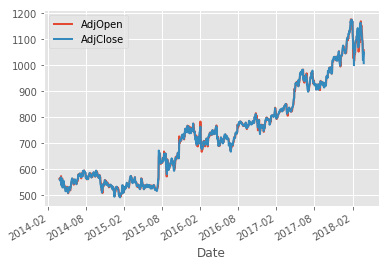

In [42]:
#plot multiple columns
google[['AdjOpen','AdjClose']].plot()

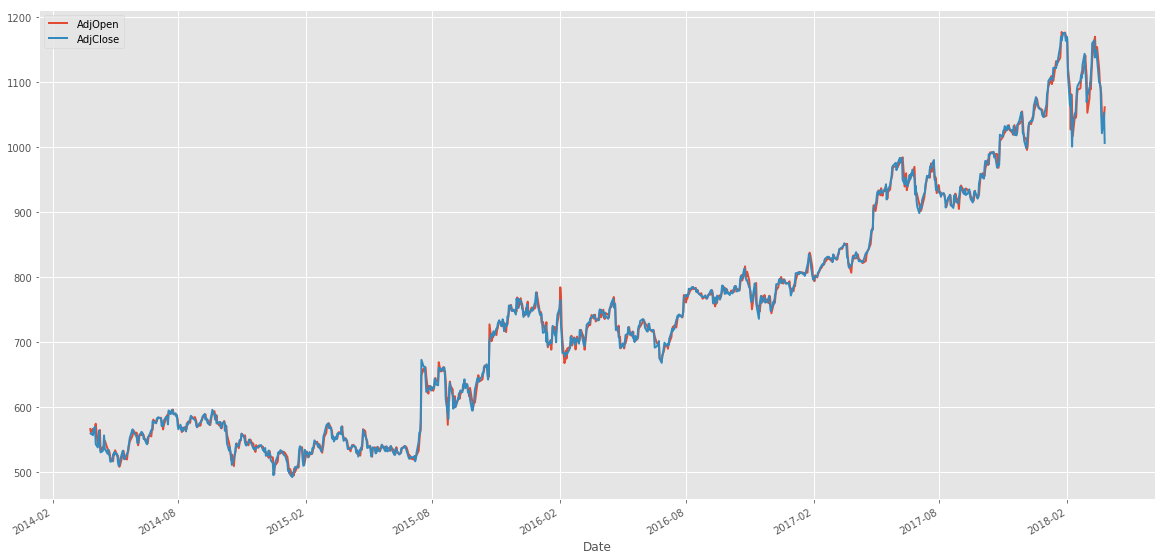

In [43]:
#let's stretch out the plot to be able to see it better
google[['AdjOpen','AdjClose']].plot(figsize=(20,10))

# Make it pretty!

In [33]:
#grab a template from the matplotlib.  

#First, let's see what templates are available
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

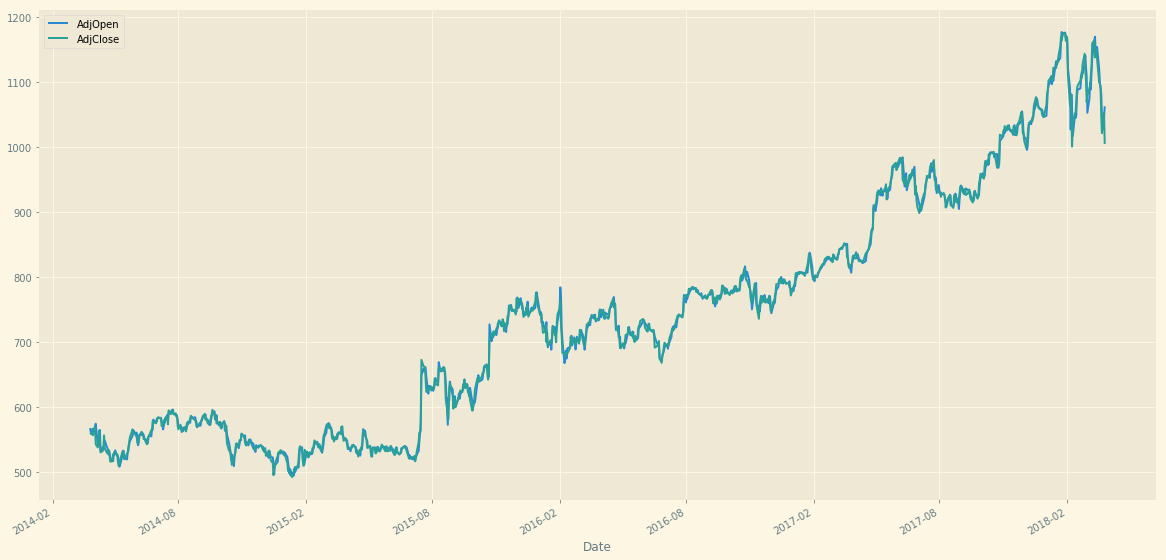

In [44]:
plt.style.use('Solarize_Light2') #note that this will change the stylesheet for the entire Jupyter notebook
google[['AdjOpen','AdjClose']].plot(figsize=(20,10))

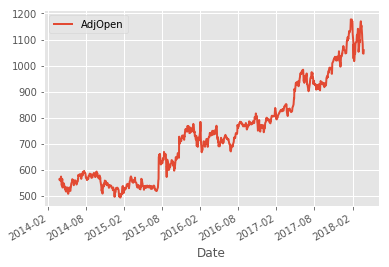

In [45]:
#change the stylesheet
plt.style.use("ggplot")
google.plot(y='AdjOpen')

# Bar graphs
good for showing counts

In [55]:
#create categories from our current graph
def rank_performance(stock_price):
    if stock_price <= 700:
        return "Poor"
    elif stock_price > 700 and stock_price <= 1100:
        return "Satisfactory"
    else:
        return "Stellar"

#count all the different performances
counts = google['AdjClose'].apply(rank_performance).value_counts()
counts

Satisfactory    540
Poor            432
Stellar          35
Name: AdjClose, dtype: int64

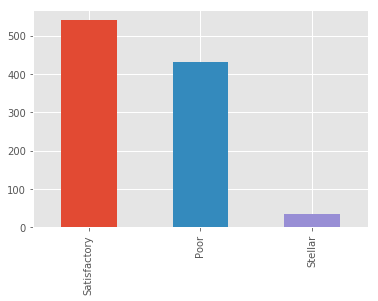

In [57]:
#create a bar graph
counts.plot(kind="bar")

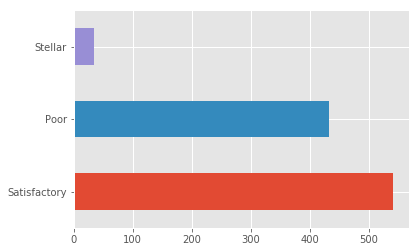

In [58]:
#look at the data horizontally using barh
counts.plot(kind="barh")

# Pie charts
used for showing how all parts add up to one whole

In [64]:
#get stock data about Amazon
amazon = data.DataReader("AMZN", data_source="quandl",start=TenYearsAgo, end=now)
amazon.tail(5)

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2008-10-24,44.75,52.32,44.500,48.96,19605900.0,0.0,1.0,44.75,52.32,44.500,48.96,19605900.0
2008-10-23,43.37,50.91,43.310,50.32,32601900.0,0.0,1.0,43.37,50.91,43.310,50.32,32601900.0
2008-10-22,50.05,52.47,47.900,49.99,19513200.0,0.0,1.0,50.05,52.47,47.900,49.99,19513200.0
2008-10-21,51.86,52.95,49.920,50.23,8669600.0,0.0,1.0,51.86,52.95,49.920,50.23,8669600.0
2008-10-20,52.17,53.10,49.906,52.97,8452100.0,0.0,1.0,52.17,53.10,49.906,52.97,8452100.0


In [67]:
#compare daily stock performance to the average stock performance
mean = amazon['AdjClose'].mean()

In [69]:
#rank performance as below or above average
def rank_against_mean(stock_price):
    if stock_price >= mean:
        return "Above Average"
    else:
        return "Below Average"

In [71]:
amazon_counts = amazon['AdjClose'].apply(rank_against_mean).value_counts()

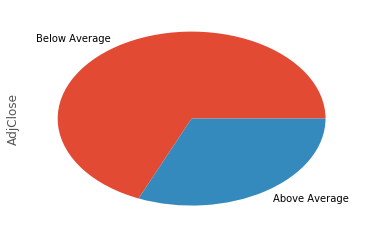

In [72]:
#plot on a pie chart
amazon_counts.plot(kind="pie")

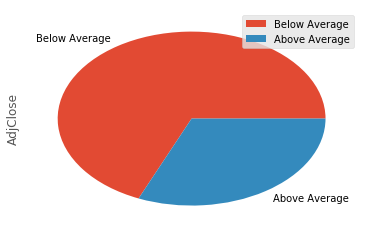

In [75]:
#add a legend
amazon_counts.plot(kind="pie", legend=True)

# Histograms
good for showing distributions, or the shape of the data

In [91]:
#create a custom function to put Amazon's stock into "buckets" of 100
def buckets_of_100s(stock_price):
    return int(stock_price/10)*10


In [92]:
amazon_bucket_count = amazon['AdjClose'].apply(buckets_of_100s).value_counts().sort_index()

In [93]:
#how many different buckets are there?
amazon['AdjClose'].apply(buckets_of_100s).nunique()

144

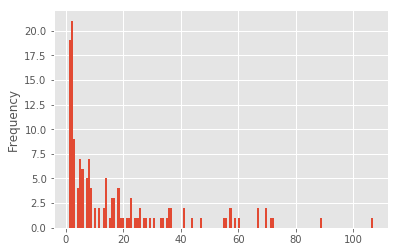

In [95]:
#let's put this into a histogram
amazon_bucket_count.plot(kind="hist", bins=144)

In [ ]:
# 